In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('C:\\Users\\psiuy\\Python for ML\\Transaction_Report_2021_2022.xls',parse_dates=[3])

In [3]:
df.head()

,Order Number,Order Type,Table,Time,Scheduled Time,Status,Tender,No. of guest,Sub-total,Tax,Service Charge,Delivery Fee,Tips,Discount,Order Total,Source,Customer Name,Customer Phone
0,C114,Takeout,NaN,2021-01-01 00:09:12,ASAP,Completed,Cash,1,64.0,0,NaN,NaN,0,6.4,58.0,NaN,,NaN
1,C115,Takeout,NaN,2021-01-01 00:14:16,ASAP,Completed,Cash,1,56.0,0,NaN,NaN,0,0.0,56.0,NaN,,NaN
2,C116,Takeout,NaN,2021-01-01 00:17:19,ASAP,Completed,Cash,1,65.0,0,NaN,NaN,0,0.0,65.0,NaN,,NaN
3,C117,Takeout,NaN,2021-01-01 00:19:18,ASAP,Completed,Cash,1,29.0,0,NaN,NaN,0,0.0,29.0,NaN,,NaN
4,C118,Takeout,NaN,2021-01-01 00:25:50,ASAP,Completed,Cash,1,72.0,0,NaN,NaN,0,0.0,72.0,NaN,,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60281 entries, 0 to 60280
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Number    60281 non-null  object        
 1   Order Type      60281 non-null  object        
 2   Table           29721 non-null  float64       
 3   Time            60281 non-null  datetime64[ns]
 4   Scheduled Time  30560 non-null  object        
 5   Status          60281 non-null  object        
 6   Tender          60170 non-null  object        
 7   No. of guest    60281 non-null  int64         
 8   Sub-total       60281 non-null  float64       
 9   Tax             60281 non-null  int64         
 10  Service Charge  29721 non-null  float64       
 11  Delivery Fee    0 non-null      float64       
 12  Tips            60281 non-null  int64         
 13  Discount        60281 non-null  float64       
 14  Order Total     60281 non-null  float64       
 15  So

In [5]:
df.describe()

,Table,No. of guest,Sub-total,Tax,Service Charge,Delivery Fee,Tips,Discount,Order Total,Source,Customer Phone
count,29721.000000,60281.000000,60281.000000,60281.0,29721.0,0.0,60281.000000,60281.000000,60281.000000,0.0,0.0
mean,5.203156,1.000365,68.475012,0.0,0.0,NaN,0.016921,0.948343,67.526494,NaN,NaN
std,3.279485,0.041535,55.040680,0.0,0.0,NaN,2.483752,7.101881,54.178590,NaN,NaN
min,1.000000,1.000000,0.000000,0.0,0.0,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,3.000000,1.000000,37.000000,0.0,0.0,NaN,0.000000,0.000000,36.000000,NaN,NaN
50%,5.000000,1.000000,59.000000,0.0,0.0,NaN,0.000000,0.000000,58.000000,NaN,NaN
75%,8.000000,1.000000,82.000000,0.0,0.0,NaN,0.000000,0.000000,81.000000,NaN,NaN
max,12.000000,10.000000,4484.000000,0.0,0.0,NaN,431.000000,319.000000,4484.000000,NaN,NaN


### Data Cleaning

In [6]:
#check missing value
missing_data = df.isnull().sum().sort_values()
missing_data

Order Number          0
Order Total           0
Discount              0
Tips                  0
Tax                   0
Customer Name         0
No. of guest          0
Sub-total             0
Status                0
Time                  0
Order Type            0
Tender              111
Scheduled Time    29721
Service Charge    30560
Table             30560
Delivery Fee      60281
Source            60281
Customer Phone    60281
dtype: int64

In [7]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [8]:
percent_nan = percent_missing(df)

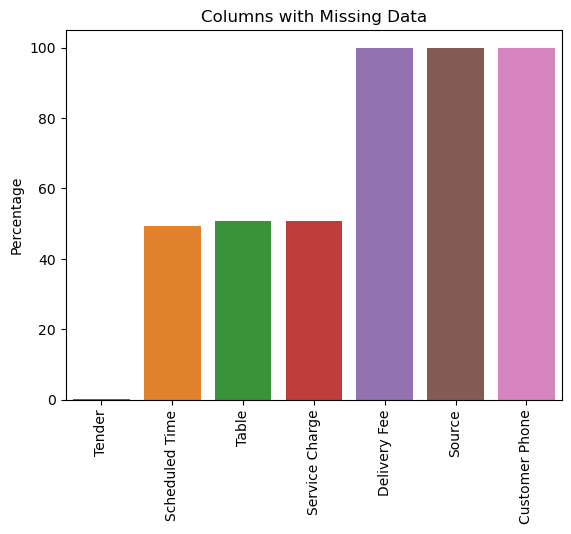

In [9]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.ylabel('Percentage')
plt.title('Columns with Missing Data')
plt.xticks(rotation=90);

In [10]:
percent_nan

Tender              0.184138
Scheduled Time     49.304093
Table              50.695907
Service Charge     50.695907
Delivery Fee      100.000000
Source            100.000000
Customer Phone    100.000000
dtype: float64

In [11]:
#Columns Delivery Fee, Source & Customer Phone miss 100% data, thus drop entire columns
df = df.drop(['Delivery Fee','Source','Customer Phone'],axis=1)

In [12]:
df['Customer Name'].value_counts()

     60281
Name: Customer Name, dtype: int64

In [13]:
#Drop column Customer Name due to all blank input
df = df.drop('Customer Name',axis=1)

In [14]:
df['Scheduled Time'].value_counts()

ASAP    30560
Name: Scheduled Time, dtype: int64

In [15]:
#Drop column Scheduled Time due to uniform input without interpretable meaning
df = df.drop('Scheduled Time',axis=1)

In [16]:
df['Service Charge'].value_counts()

0.0    29721
Name: Service Charge, dtype: int64

In [17]:
#Fill all the nan with 0
df['Service Charge'] = df['Service Charge'].fillna(0)

In [18]:
df['Table'].value_counts()

1.0     4786
3.0     4732
5.0     3179
7.0     2901
2.0     2469
6.0     2228
8.0     2160
4.0     1854
12.0    1759
9.0     1745
10.0    1344
11.0     564
Name: Table, dtype: int64

In [19]:
#Drop column Table due to Table number with little interpretable meaning and more than 50% data are missing
df = df.drop('Table',axis=1)

In [20]:
df['Tender'].value_counts()

Cash         56667
Deliveroo     2458
FoodPanda      831
Multiple       126
Openrice        30
UberEATS        24
Kai Kai         20
HkTVmall        12
M/C              1
Alipay           1
Name: Tender, dtype: int64

In [21]:
#Drop nan rows of Tender because the missing data only accounts for less than 1%
df = df.dropna()

In [22]:
df.isnull().sum()

Order Number      0
Order Type        0
Time              0
Status            0
Tender            0
No. of guest      0
Sub-total         0
Tax               0
Service Charge    0
Tips              0
Discount          0
Order Total       0
dtype: int64

In [23]:
df.head()

,Order Number,Order Type,Time,Status,Tender,No. of guest,Sub-total,Tax,Service Charge,Tips,Discount,Order Total
0,C114,Takeout,2021-01-01 00:09:12,Completed,Cash,1,64.0,0,0.0,0,6.4,58.0
1,C115,Takeout,2021-01-01 00:14:16,Completed,Cash,1,56.0,0,0.0,0,0.0,56.0
2,C116,Takeout,2021-01-01 00:17:19,Completed,Cash,1,65.0,0,0.0,0,0.0,65.0
3,C117,Takeout,2021-01-01 00:19:18,Completed,Cash,1,29.0,0,0.0,0,0.0,29.0
4,C118,Takeout,2021-01-01 00:25:50,Completed,Cash,1,72.0,0,0.0,0,0.0,72.0


### EDA

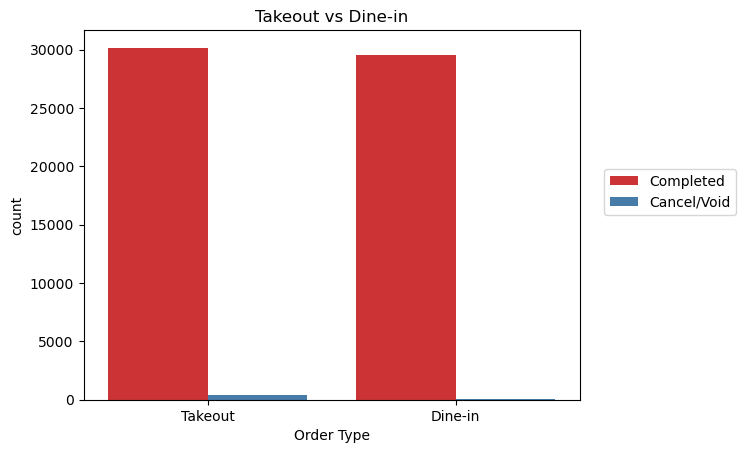

In [24]:
sns.countplot(data=df,x='Order Type',hue='Status',palette='Set1')
plt.title('Takeout vs Dine-in')
plt.legend(loc=(1.05,0.5));

In [25]:
Cancel_rate = np.round(100*(df['Status'] == 'Cancel/Void').sum() /len(df),2)
print(f'Cancel_rate is around {Cancel_rate} %.')

Cancel_rate is around 0.79 %.


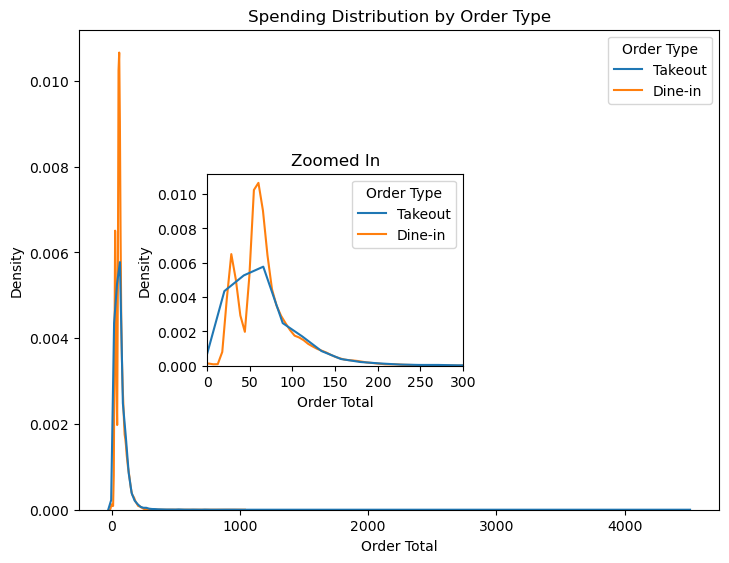

In [26]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0, 0, 1, 1]) # Large figure
sns.kdeplot(data=df,x='Order Total',hue='Order Type')
axes1.set_xlabel('Order Total')
axes1.set_title('Spending Distribution by Order Type')

axes2 = fig.add_axes([0.2, 0.3, 0.4, 0.4]) # Smaller figure
sns.kdeplot(data=df,x='Order Total',hue='Order Type')
# Insert Figure Axes 2
axes2.set_xlim(0,300)
axes2.set_xlabel('Order Total')
axes2.set_title('Zoomed In');

In [27]:
print('Average spending by Order Type')
df.groupby('Order Type').mean()[['Sub-total','Tips','Discount','Order Total']]

Average spending by Order Type


,Sub-total,Tips,Discount,Order Total
Order Type,,,,
Dine-in,69.552550,0.003647,0.450695,69.101135
Takeout,67.679686,0.029843,1.433965,66.246073


In [28]:
print('Standard deviation by Order Type')
df.groupby('Order Type').std()[['Sub-total','Tips','Discount','Order Total']]

Standard deviation by Order Type


,Sub-total,Tips,Discount,Order Total
Order Type,,,,
Dine-in,36.948003,0.356809,4.875092,36.770230
Takeout,68.076228,3.470617,8.716856,66.779661


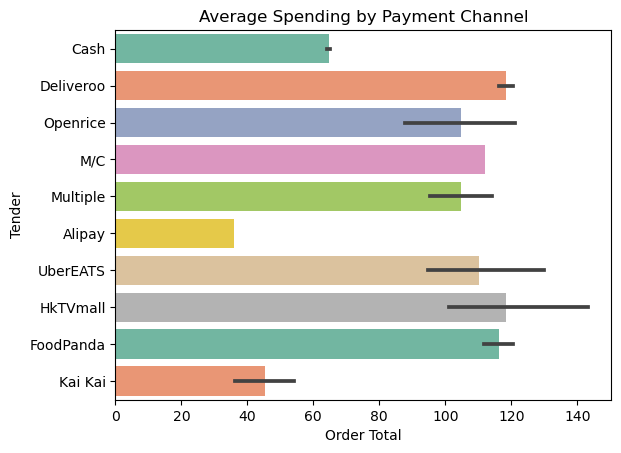

In [29]:
sns.barplot(data=df,x='Order Total',y='Tender',palette='Set2')
plt.title('Average Spending by Payment Channel');

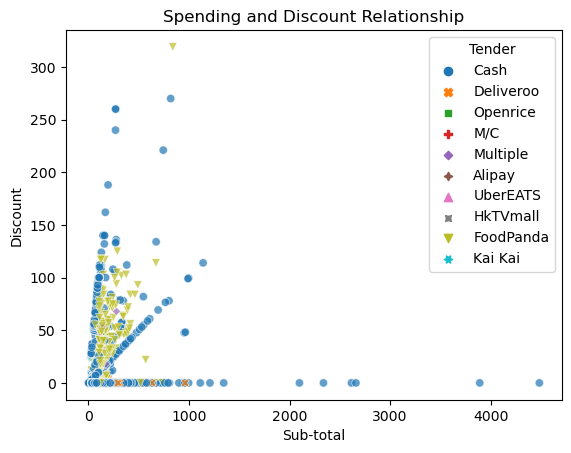

In [30]:
plt.figure(dpi=100)
sns.scatterplot(data=df,x='Sub-total',y='Discount',hue='Tender',alpha=0.7,style='Tender')
plt.title('Spending and Discount Relationship');

In [31]:
df.nlargest(10,'Sub-total')

,Order Number,Order Type,Time,Status,Tender,No. of guest,Sub-total,Tax,Service Charge,Tips,Discount,Order Total
58383,C18,Takeout,2022-12-20 17:32:17,Completed,Cash,1,4484.0,0,0.0,0,0.0,4484.0
58382,C17,Takeout,2022-12-20 17:31:37,Completed,Cash,1,3891.0,0,0.0,0,0.0,3891.0
48720,C20,Takeout,2022-09-22 18:42:42,Completed,Cash,1,2660.0,0,0.0,0,0.0,2660.0
48702,C1,Takeout,2022-09-22 14:18:16,Cancel/Void,Cash,1,2615.0,0,0.0,0,0.0,2615.0
9991,C1,Takeout,2021-05-14 15:07:14,Completed,Cash,1,2337.0,0,0.0,0,0.0,2337.0
18159,C1,Takeout,2021-08-20 13:24:46,Completed,Cash,1,2098.0,0,0.0,0,0.0,2098.0
41414,C1,Takeout,2022-06-24 14:59:36,Completed,Cash,1,1345.0,0,0.0,0,0.0,1345.0
47724,C2,Takeout,2022-09-11 15:19:31,Completed,Cash,1,1208.0,0,0.0,0,0.0,1208.0
22735,C14,Dine-in,2021-10-25 17:43:56,Completed,Cash,1,1140.0,0,0.0,0,114.0,1026.0
47634,C1,Takeout,2022-09-10 15:11:41,Cancel/Void,Cash,1,1112.0,0,0.0,0,0.0,1112.0


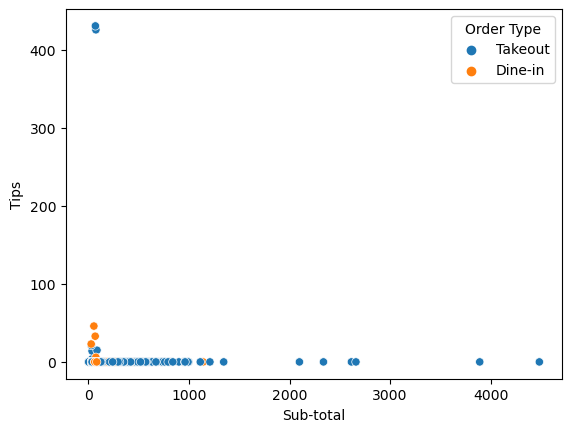

In [32]:
sns.scatterplot(data=df,x='Sub-total',y='Tips',hue='Order Type');

In [33]:
df[df['Tips']>400]

,Order Number,Order Type,Time,Status,Tender,No. of guest,Sub-total,Tax,Service Charge,Tips,Discount,Order Total
20792,C115,Takeout,2021-09-17 23:50:01,Completed,UberEATS,1,74.0,0,0.0,426,0.0,74.0
52817,C26,Takeout,2022-10-29 17:28:41,Completed,FoodPanda,1,69.0,0,0.0,431,0.0,69.0


In [34]:
df.groupby('Order Type').mean()['Tips']

Order Type
Dine-in    0.003647
Takeout    0.029843
Name: Tips, dtype: float64

In [35]:
df[df['Tips'] > 0].groupby('Order Type').count()['Tips']

Order Type
Dine-in    4
Takeout    7
Name: Tips, dtype: int64

In [36]:
df.corr()

,No. of guest,Sub-total,Tax,Service Charge,Tips,Discount,Order Total
No. of guest,1.000000,0.002542,NaN,NaN,-0.000060,-0.001176,0.002737
Sub-total,0.002542,1.000000,NaN,NaN,-0.000047,0.185027,0.991646
Tax,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service Charge,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tips,-0.000060,-0.000047,NaN,NaN,1.000000,-0.000884,0.000068
Discount,-0.001176,0.185027,NaN,NaN,-0.000884,1.000000,0.056720
Order Total,0.002737,0.991646,NaN,NaN,0.000068,0.056720,1.000000


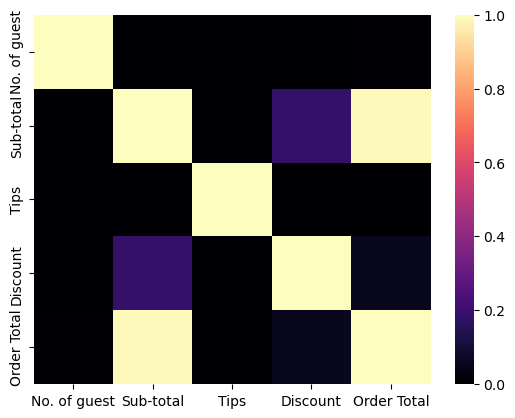

In [37]:
sns.heatmap(df.drop(['Tax','Service Charge'],axis=1).corr(),cmap='magma');

### Sales Summary

In [38]:
Sales = pd.read_excel('C:\\Users\\psiuy\\Python for ML\\Sales_Summary_2021_2022.xls')

In [39]:
Sales.head()

,Date,Sales,Discount Amount,Refund,Net Sales,Rounding Differences,Tips,Customers,Avg. Spending,Quantity_HkTVmall,...,$.6,Quantity_UberEATS,$.7,Quantity_Alipay,$.8,Quantity_WeChat Pay,$.9,Quantity_Openrice,$.10,Total Tendered
0,2021-01-01 (Fri),6592.0,46.00,0.0,6546.00,-1.00,0,104,62.94,0,...,0,0,0,0,0,0,0,2,62,6547.0
1,2021-01-02 (Sat),6785.0,65.95,-247.0,6472.05,0.05,0,111,58.31,0,...,0,0,0,0,0,0,0,2,209,6472.0
2,2021-01-03 (Sun),4792.0,9.70,-228.0,4554.30,-0.70,0,72,63.25,0,...,0,0,0,0,0,0,0,0,0,4555.0
3,2021-01-04 (Mon),4113.0,10.70,-170.0,3932.30,0.30,0,67,58.69,0,...,0,0,0,0,0,0,0,0,0,3932.0
4,2021-01-05 (Tue),2635.0,0.00,0.0,2635.00,0.00,0,52,50.67,0,...,0,0,0,0,0,0,0,0,0,2635.0


In [40]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  730 non-null    object 
 1   Sales                 730 non-null    float64
 2   Discount Amount       730 non-null    float64
 3   Refund                730 non-null    float64
 4   Net Sales             730 non-null    float64
 5   Rounding Differences  730 non-null    float64
 6   Tips                  730 non-null    int64  
 7   Customers             730 non-null    int64  
 8   Avg. Spending         730 non-null    float64
 9   Quantity_HkTVmall     730 non-null    int64  
 10  $                     730 non-null    int64  
 11  Quantity_Kai Kai      730 non-null    int64  
 12  $.1                   730 non-null    int64  
 13  Quantity_Cash         730 non-null    int64  
 14  $.2                   730 non-null    float64
 15  Quantity_VISA         7

In [41]:
Sales.describe()

,Sales,Discount Amount,Refund,Net Sales,Rounding Differences,Tips,Customers,Avg. Spending,Quantity_HkTVmall,$,...,$.6,Quantity_UberEATS,$.7,Quantity_Alipay,$.8,Quantity_WeChat Pay,$.9,Quantity_Openrice,$.10,Total Tendered
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.0,730.000000,730.000000,730.000000
mean,5654.441370,76.782808,-59.927671,5517.730890,0.012260,1.397260,81.805479,64.072384,0.019178,2.161644,...,132.742466,0.042466,4.135616,0.004110,0.068493,0.002740,0.0,0.043836,4.300000,5519.115890
std,2630.872695,106.199023,164.648710,2568.730906,0.509554,22.542774,32.555037,14.837965,0.172656,19.959937,...,260.980844,0.266264,30.077166,0.082715,1.850583,0.074023,0.0,0.241728,26.382938,2570.124946
min,0.000000,0.000000,-2751.000000,0.000000,-3.900000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,4039.425000,11.000000,-64.000000,3903.100000,-0.100000,0.000000,64.000000,60.255000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3903.250000
50%,5368.000000,36.650000,0.000000,5273.250000,0.000000,0.000000,81.000000,65.120000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,5274.000000
75%,6871.750000,105.250000,0.000000,6786.850000,0.300000,0.000000,100.000000,70.830000,0.000000,0.000000,...,199.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,6786.750000
max,23358.000000,866.000000,0.000000,22659.600000,2.390000,431.000000,257.000000,145.510000,3.000000,364.000000,...,3342.000000,4.000000,500.000000,2.000000,50.000000,2.000000,0.0,2.000000,360.000000,22660.000000


In [42]:
Sales['Day_of_week'] = Sales['Date'].str.split('(').str[1].str[-4:-1]

In [43]:
Sales['Date'] = Sales['Date'].str.split('(').str[0]

In [44]:
from datetime import datetime

In [45]:
Sales['Date'] = pd.to_datetime(Sales['Date'])

In [46]:
Sales = Sales.set_index('Date')

In [47]:
# Monthly Sales
Monthly_sales = Sales.resample(rule='M').sum()

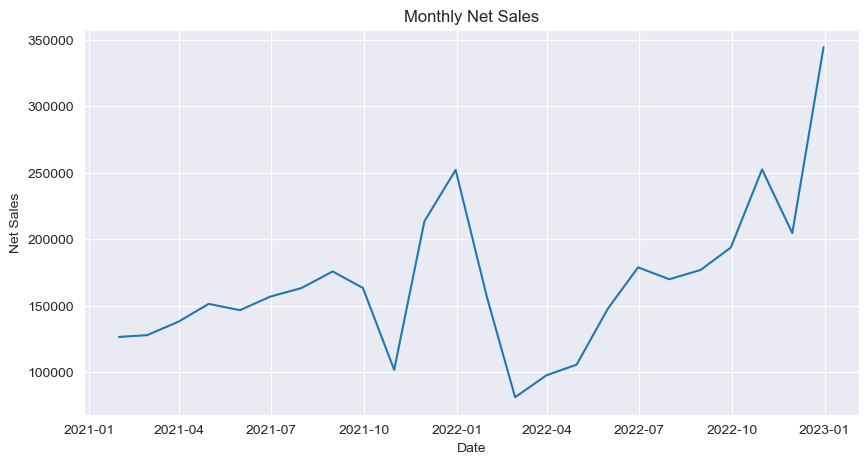

In [48]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.lineplot(data=Monthly_sales,y='Net Sales',x=Monthly_sales.index)
plt.title('Monthly Net Sales');

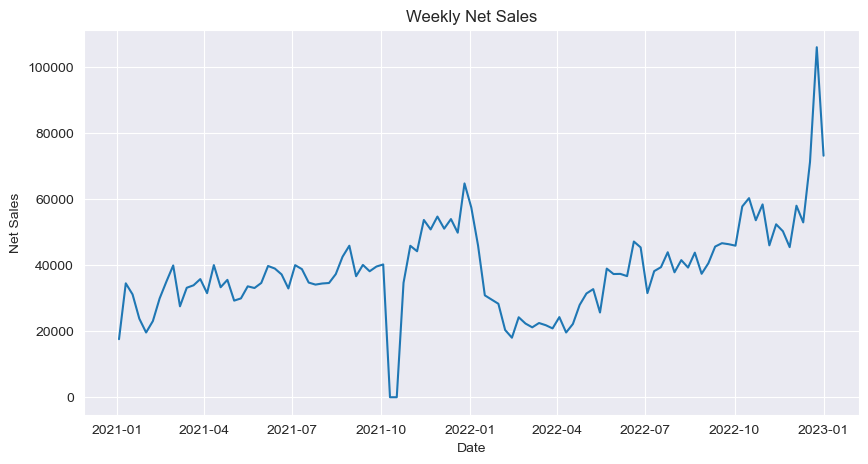

In [49]:
# Weekly Sales
Weekly_sales = Sales.resample(rule='W').sum()
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.lineplot(data=Weekly_sales,y='Net Sales',x=Weekly_sales.index)
plt.title('Weekly Net Sales');

In [50]:
Sales.resample(rule='Y').sum()['Net Sales']

Date
2021-12-31    1917670.07
2022-12-31    2110273.48
Freq: A-DEC, Name: Net Sales, dtype: float64

In [51]:
Yearly_growth_rate = np.round(((2110273 - 1917670) / 1917670 * 100),2)
print('2021-2022 yearly growth rate is {}%.'.format(Yearly_growth_rate))

2021-2022 yearly growth rate is 10.04%.


In [52]:
Monthly_customer = np.round(Sales.resample(rule='M').mean(),0)

In [53]:
Monthly_customer = Monthly_customer.reset_index()

In [54]:
Monthly = np.array(str(Monthly_customer['Date']).split()[1::2])[:-2]

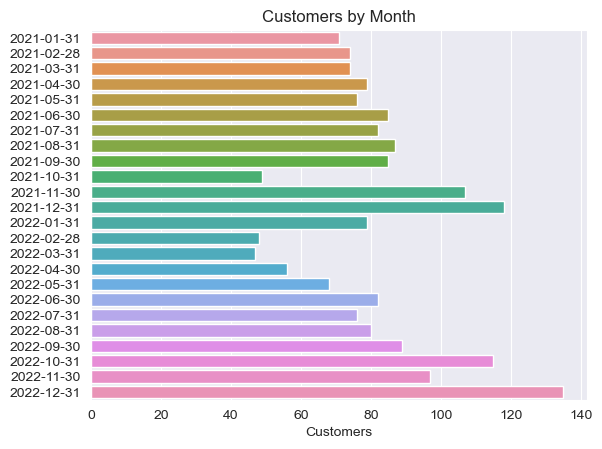

In [55]:
sns.barplot(x=Monthly_customer['Customers'],y=Monthly)
plt.title('Customers by Month');

In [56]:
Sales = Sales.reset_index()

In [57]:
Sales

,Date,Sales,Discount Amount,Refund,Net Sales,Rounding Differences,Tips,Customers,Avg. Spending,Quantity_HkTVmall,...,Quantity_UberEATS,$.7,Quantity_Alipay,$.8,Quantity_WeChat Pay,$.9,Quantity_Openrice,$.10,Total Tendered,Day_of_week
0,2021-01-01,6592.0,46.00,0.0,6546.00,-1.00,0,104,62.94,0,...,0,0,0,0,0,0,2,62,6547.0,Fri
1,2021-01-02,6785.0,65.95,-247.0,6472.05,0.05,0,111,58.31,0,...,0,0,0,0,0,0,2,209,6472.0,Sat
2,2021-01-03,4792.0,9.70,-228.0,4554.30,-0.70,0,72,63.25,0,...,0,0,0,0,0,0,0,0,4555.0,Sun
3,2021-01-04,4113.0,10.70,-170.0,3932.30,0.30,0,67,58.69,0,...,0,0,0,0,0,0,0,0,3932.0,Mon
4,2021-01-05,2635.0,0.00,0.0,2635.00,0.00,0,52,50.67,0,...,0,0,0,0,0,0,0,0,2635.0,Tue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2022-12-27,10337.0,66.60,0.0,10270.40,0.40,0,122,84.18,0,...,0,0,0,0,0,0,0,0,10270.0,Tue
726,2022-12-28,10397.0,234.00,0.0,10163.00,0.00,0,134,75.84,0,...,0,0,0,0,0,0,0,0,10163.0,Wed
727,2022-12-29,10964.0,188.00,-138.0,10638.00,0.00,0,124,85.79,0,...,0,0,0,0,0,0,0,0,10638.0,Thu
728,2022-12-30,15473.0,866.00,-34.0,14573.00,0.00,0,172,84.73,0,...,0,0,0,0,0,0,0,0,14573.0,Fri


In [58]:
#Calculte days of refund in %
np.round((Sales['Refund'].apply(abs) > 0).sum() / len(Sales) * 100,2)

40.27

In [59]:
#Top 5 day of refund
Sales.nsmallest(5,'Refund')

,Date,Sales,Discount Amount,Refund,Net Sales,Rounding Differences,Tips,Customers,Avg. Spending,Quantity_HkTVmall,...,Quantity_UberEATS,$.7,Quantity_Alipay,$.8,Quantity_WeChat Pay,$.9,Quantity_Openrice,$.10,Total Tendered,Day_of_week
629,2022-09-22,11250.0,344.00,-2751.0,8155.00,0.00,0,85,95.94,0,...,0,0,0,0,0,0,0,0,8155.0,Thu
428,2022-03-05,5372.0,66.60,-1578.0,3727.40,-0.60,0,58,64.27,0,...,0,0,0,0,0,0,0,0,3728.0,Sat
617,2022-09-10,8507.0,28.50,-1112.0,7366.50,-0.50,0,89,82.77,0,...,0,0,0,0,0,0,0,0,7367.0,Sat
524,2022-06-09,6952.0,99.60,-996.0,5856.40,0.40,0,70,83.66,0,...,0,0,0,0,0,0,0,0,5856.0,Thu
581,2022-08-05,8935.0,199.45,-958.0,7777.55,0.55,0,90,86.42,0,...,0,0,0,0,0,0,0,0,7777.0,Fri


In [60]:
Sales_by_day = Sales.groupby('Day_of_week').mean()[['Net Sales','Tips','Customers','Avg. Spending']].sort_values('Net Sales')

In [61]:
Sales_by_day

,Net Sales,Tips,Customers,Avg. Spending
Day_of_week,,,,
Mon,4582.000385,0.000000,69.567308,61.305385
Wed,4663.950481,0.259615,71.173077,62.305096
Tue,4781.176538,0.144231,72.413462,61.776442
Thu,5230.621827,0.000000,77.278846,64.563942
Sun,5607.253750,0.817308,82.932692,65.575962
Fri,6697.271905,4.390476,96.257143,66.859810
Sat,7035.901810,4.114286,102.676190,66.074000


In [62]:
Sales_by_day = Sales_by_day.reset_index()

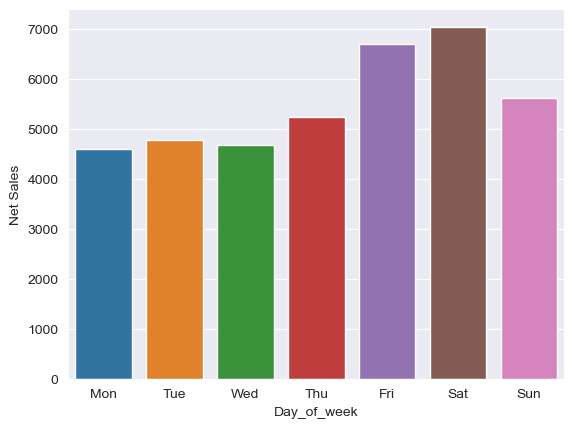

In [63]:
sns.barplot(data=Sales_by_day,x='Day_of_week',y='Net Sales',order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']);

In [64]:
Hourly_2021 = pd.read_excel('C:\\Users\\psiuy\\Python for ML\\Hourly_Sales_Report_2021.xls')
Hourly_2022 = pd.read_excel('C:\\Users\\psiuy\\Python for ML\\Hourly_Sales_Report_2022.xls')

In [65]:
Hourly_2021.head()

,Time,Total Tendered,Net Sales,Net Sales%,Transaction Count,Transaction Count %,Customers,Average Sales,Quantity,Quantity %
0,00:00 - 01:00,1883,1882.8,0.001,36,0.0012,36,52.3,61,0.001
1,01:00 - 02:00,0,0.0,0.000,0,0.0000,0,0.0,0,0.000
2,02:00 - 03:00,0,0.0,0.000,0,0.0000,0,0.0,0,0.000
3,03:00 - 04:00,0,0.0,0.000,0,0.0000,0,0.0,0,0.000
4,04:00 - 05:00,0,0.0,0.000,0,0.0000,0,0.0,0,0.000


In [66]:
Hourly_2021.describe()

,Total Tendered,Net Sales,Net Sales%,Transaction Count,Transaction Count %,Customers,Average Sales,Quantity,Quantity %
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,79923.500000,79902.919583,0.041667,1251.166667,0.041671,1251.375000,116.072083,2564.208333,0.041671
std,136267.388139,136262.127275,0.071055,2034.488926,0.067763,2034.540388,423.335393,4393.097461,0.071386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,479.000000,479.000000,0.000250,0.500000,0.000000,0.500000,26.150000,7.000000,0.000100
75%,124034.000000,124037.420000,0.064675,2221.750000,0.074025,2223.250000,61.707500,3976.000000,0.064600
max,494979.000000,494977.560000,0.258100,7053.000000,0.234900,7053.000000,2098.000000,15897.000000,0.258300


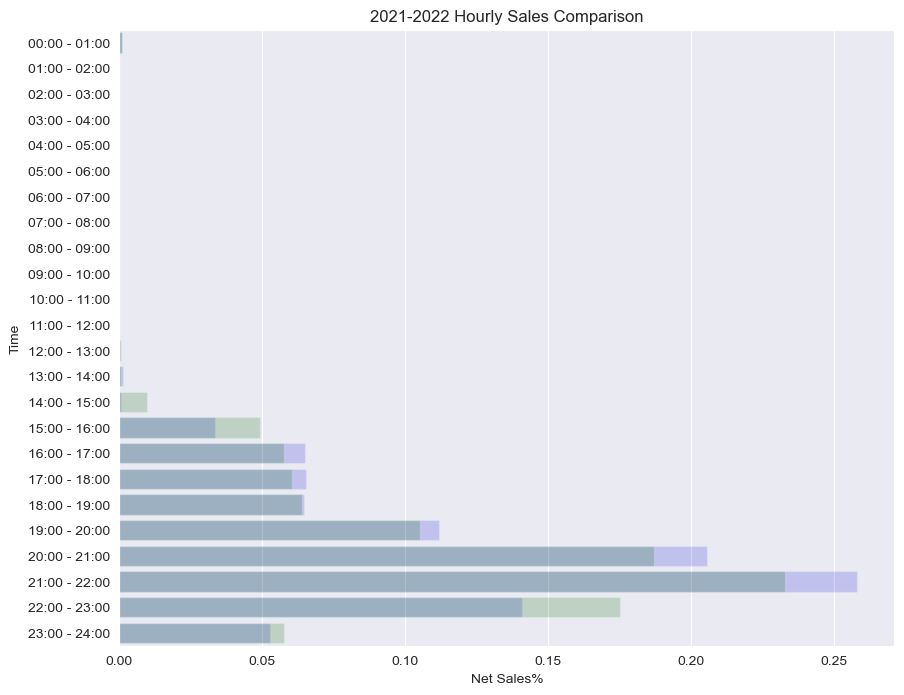

In [67]:
plt.figure(figsize=(10,8),dpi=100)
plt.title('2021-2022 Hourly Sales Comparison')
sns.barplot(data=Hourly_2021,x='Net Sales%',y='Time',color='blue',alpha=0.2)
sns.barplot(data=Hourly_2022,x='Net Sales%',y='Time',color='green',alpha=0.2);